In [92]:
import networkx as nx
import matplotlib.pyplot as plt

class LoadFromFile(object):
    def __init__(self):
        """
        Initiate variables for the class.
        """
        self.g = nx.Graph()

        pass
        
    def from_in_class_network(self, path):  
        '''
        Prob. 4-a.
        1. read the txt file by line, and split it by tab
        2. ID stored in the first index of the line, append them in 'nodelist'
        3. IDs-of-acquaintances stored in the second index of the line,
        combine them with the correspond ID and store them in 'edgelist'.
        4. Remind that there may be more than one acquaintance in the data,
        split it by ',' and store them in 'temp_edge'
        5. parse the 'nodelist' and 'edgelist' data into nx.Graph()
        6. return the graph
        '''
        edgelist = []
        nodelist = []
        counter = 0
        with open(path, 'r') as f:
            for line in f:
                node_pair = line.replace('\n', '').split('\t')
                if counter != 0:
                    nodelist += [node_pair[0]]
                    temp_edge = node_pair[1].split(',')
                    for i in range(len(temp_edge)):
                        if (node_pair[1][i].isspace() == False) :
                            current_edge = [node_pair[0], temp_edge[i]]
                            edgelist += [current_edge]
                counter = counter + 1
        self.g.add_edges_from(edgelist)
        print(nx.info(self.g))
        print('Edgelist txt data successfully loaded into a networkx Graph!')
        return self.g
    
    def degree_dist(self):  # This is Prob. 3-d.
        '''
        Prob. 4-a.
        1. find all the nodes from self.g.nodes(), store them in 'all_nodes'
        2. find the degree of each nodes stored in 'all_nodes', store the result in 'list_of_degree'
        3. append the value of 'list_of_degree' to 'all_degree'
        (I don't know why .values() return 'no attribute' error to me with self.g.degree(all_nodes).values(),
        thus i chose an alternative way to deal with it)
        4. return 'all_degree'
        5. plot 'all_degree' by matplotlib in the next cell
        '''
        all_nodes = self.g.nodes()
        list_of_degree = list(self.g.degree(all_nodes))
        
        all_degree = []
        for i in range(len(list_of_degree)):
            all_degree.append(list_of_degree[i][1])

        
        return all_degree
     
in_class = LoadFromFile()
in_class.from_in_class_network('E:/WORKOUT/Statistic/data_sciense_intro/hw3/In-class_network.txt')
        

Name: 
Type: Graph
Number of nodes: 73
Number of edges: 109
Average degree:   2.9863
Edgelist txt data successfully loaded into a networkx Graph!


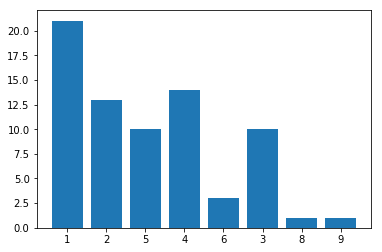

In [75]:
# prob 3.d
all_degree = in_class.degree_dist()
degree_dict = {i:all_degree.count(i) for i in all_degree}

names = list(degree_dict.keys())
values = list(degree_dict.values())

plt.bar(range(len(degree_dict)),values,tick_label=names)
plt.show()